In [17]:
import pandas as pd
%pylab inline
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

Populating the interactive namespace from numpy and matplotlib


In [18]:
df = pd.read_csv("train.csv")


In [19]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['pclass'] = df['Pclass']
X['sibsp'] = df['SibSp']
X['parch'] = df['Parch']

In [22]:
#we'll calculate the mean of the missing ages and fill them with the mean
meanAge = X['age'].mean()
X['age'] = X['age'].fillna(meanAge)

In [23]:
#Dependent variable is survived
y=df['Survived']

In [24]:
X

,sex,age,pclass,sibsp,parch
0,male,22.000000,3,1,0
1,female,38.000000,1,1,0
2,female,26.000000,3,0,0
3,female,35.000000,1,1,0
4,male,35.000000,3,0,0
5,male,29.699118,3,0,0
6,male,54.000000,1,0,0
7,male,2.000000,3,3,1
8,female,27.000000,3,0,2
9,female,14.000000,2,1,0


In [25]:
X['sex'] = pd.get_dummies(X.sex)['female']

In [26]:
X = X.join(pd.get_dummies(df.Pclass, prefix='pclass'))
X = X.drop(['pclass_1', 'pclass'], axis=1)

In [27]:
#Fill out all missing values 
X['age'] = X['age'].fillna(X['age'].mean())

In [28]:
X

,sex,age,sibsp,parch,pclass_2,pclass_3
0,0,22.000000,1,0,0,1
1,1,38.000000,1,0,0,0
2,1,26.000000,0,0,0,1
3,1,35.000000,1,0,0,0
4,0,35.000000,0,0,0,1
5,0,29.699118,0,0,0,1
6,0,54.000000,0,0,0,0
7,0,2.000000,3,1,0,1
8,1,27.000000,0,2,0,1
9,1,14.000000,1,0,1,0


In [29]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model=LogisticRegression(penalty='l2', C=10)


In [32]:
model.fit(X_train,y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
accuracy_score(y_test,model.predict(X_test))

0.82122905027932958

Logistic Regression is 0.82122905027932958

In [34]:
roc_auc_score(y_test, model.predict(X_test))

0.80772200772200775

Logistic AUC = 0.80772200772200775

In [35]:
a = classification_report(y_test, model.predict(X_test) )

In [37]:
print (a);

             precision    recall  f1-score   support

          0       0.82      0.89      0.85       105
          1       0.82      0.73      0.77        74

avg / total       0.82      0.82      0.82       179



In [38]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

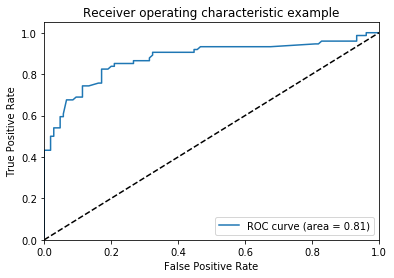

In [39]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, model.predict(X_test)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()